#  Exploratory Data Analysis

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings

warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})

# Load cleaned data

In [2]:
df = pd.read_csv('../data/clean_data.csv') 
print('Data size',df.shape)
df.head()

Data size (6771768, 23)


,c_year,c_mnth,c_wday,c_hour,class,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user,c_case
0,1999,January,Monday,20.0,0,2.0,Right turn,NaN,Clear and sunny,Icy,...,Other trucks and vans,1990.0,1.0,M,41.0,Driver,No Injury,NaN,Motor Vehicle Driver,752
1,1999,January,Monday,20.0,0,2.0,Right turn,NaN,Clear and sunny,Icy,...,Light Duty Vehicle,1987.0,1.0,M,19.0,Driver,No Injury,NaN,Motor Vehicle Driver,752
2,1999,January,Monday,20.0,0,2.0,Right turn,NaN,Clear and sunny,Icy,...,Light Duty Vehicle,1987.0,2.0,F,20.0,"Front row, right outboard",Injury,Safety device used,Motor Vehicle Passenger,752
3,1999,January,Monday,8.0,0,1.0,Hit a moving object,NaN,"Freezing rain, sleet, hail",Snow,...,Light Duty Vehicle,1986.0,1.0,M,46.0,Driver,No Injury,NaN,Motor Vehicle Driver,753
4,1999,January,Monday,8.0,0,1.0,Hit a moving object,NaN,"Freezing rain, sleet, hail",Snow,...,NaN,NaN,1.0,M,5.0,Pedestrian,Injury,NaN,Pedestrian,753


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6771768 entries, 0 to 6771767
Data columns (total 23 columns):
 #   Column  Dtype  
---  ------  -----  
 0   c_year  int64  
 1   c_mnth  object 
 2   c_wday  object 
 3   c_hour  float64
 4   class   int64  
 5   c_vehs  float64
 6   c_conf  object 
 7   c_rcfg  object 
 8   c_wthr  object 
 9   c_rsur  object 
 10  c_raln  object 
 11  c_traf  object 
 12  v_id    float64
 13  v_type  object 
 14  v_year  float64
 15  p_id    float64
 16  p_sex   object 
 17  p_age   float64
 18  p_psn   object 
 19  p_isev  object 
 20  p_safe  object 
 21  p_user  object 
 22  c_case  int64  
dtypes: float64(6), int64(3), object(14)
memory usage: 1.2+ GB


# Class distribution

In [4]:
label_pct = df['class'].value_counts(normalize = True)*100
label_ct =  df['class'].value_counts()
pd.DataFrame({'labels': label_pct.index, 'count': label_ct.values, 'percentage': label_pct.values})

,labels,count,percentage
0,0,6659293,98.33906
1,1,112475,1.66094


# Descriptive statistics

In [5]:
df.drop('class', axis =1).describe()

,c_year,c_hour,c_vehs,v_id,v_year,p_id,p_age,c_case
count,6.771768e+06,6.705458e+06,6.771201e+06,6.771298e+06,6.102074e+06,6.754771e+06,6.314556e+06,6.771768e+06
mean,2.007341e+03,1.370175e+01,2.047969e+00,5.264596e+00,1.999818e+03,1.454281e+00,3.673265e+01,1.273432e+06
std,5.453024e+00,5.166753e+00,1.244772e+00,1.868352e+01,7.690798e+00,1.213755e+00,1.850699e+01,7.423571e+05
min,1.999000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.901000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.003000e+03,1.000000e+01,2.000000e+00,1.000000e+00,1.995000e+03,1.000000e+00,2.200000e+01,6.262348e+05
50%,2.007000e+03,1.400000e+01,2.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,3.500000e+01,1.271344e+06
75%,2.012000e+03,1.700000e+01,2.000000e+00,2.000000e+00,2.005000e+03,2.000000e+00,5.000000e+01,1.914787e+06
max,2.017000e+03,2.300000e+01,7.700000e+01,9.900000e+01,2.018000e+03,9.900000e+01,9.900000e+01,2.570235e+06


# Fatality rate by collision hour
- Fatality rate is high at 5 a.m. on Fridays.
- Most fatal collisions occurred when the weather is clear and sunny.
- Head on collision caused the most fatality any hour of the day.

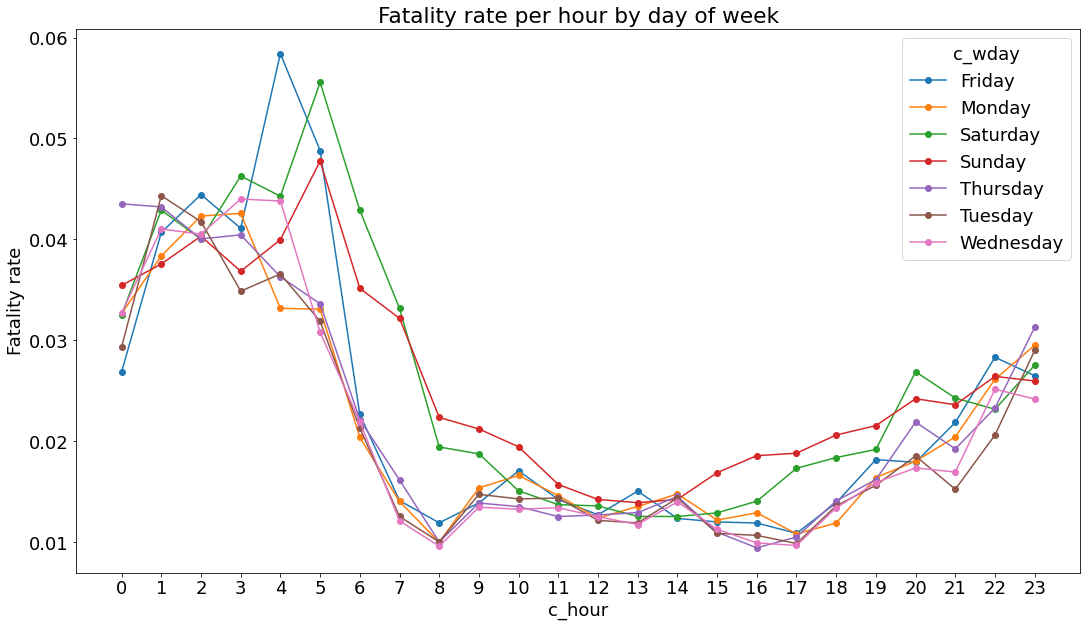

<Figure size 432x288 with 0 Axes>

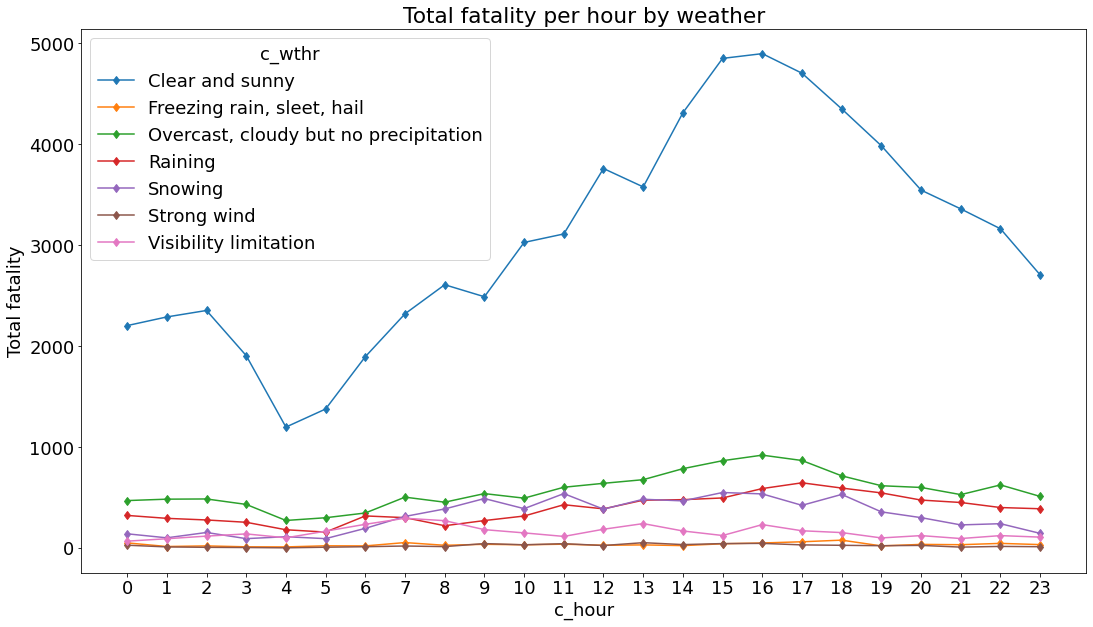

<Figure size 432x288 with 0 Axes>

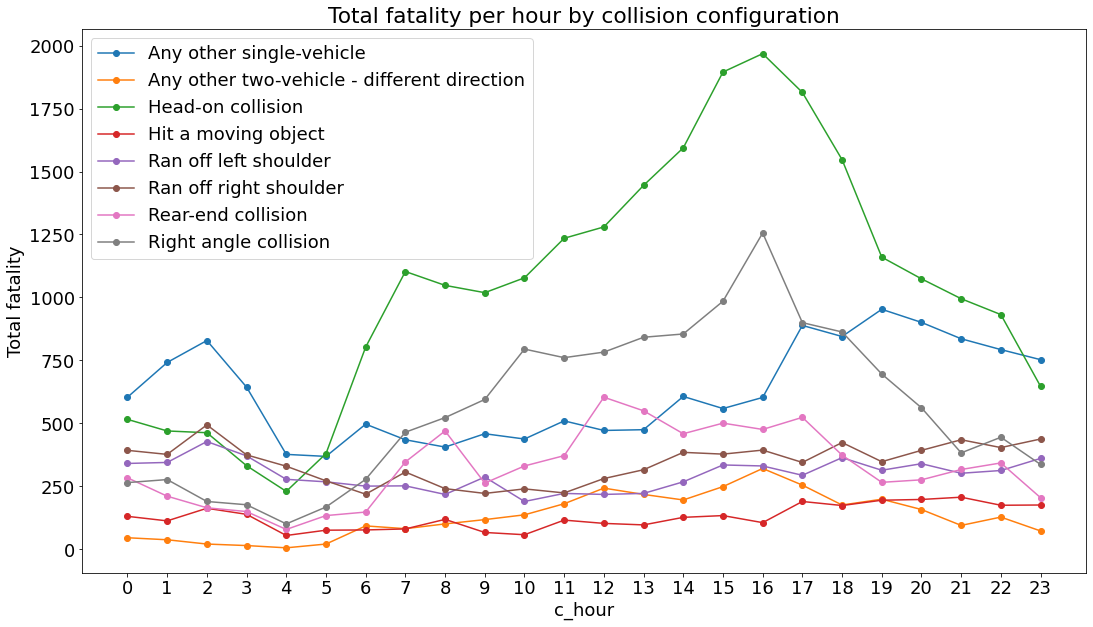

In [6]:
# pivot tables
pivot_tab_hr1 = df.pivot_table('class', index = 'c_hour', columns = 'c_wday', aggfunc = 'mean')
pivot_tab_hr2 = df.pivot_table('class', index = 'c_hour', columns = 'c_wthr', aggfunc = 'sum')
pivot_tab_hr3 = df.pivot_table('class', index = 'c_hour', columns = 'c_conf', aggfunc = 'sum')

# plots
pivot_tab_hr1.plot(marker = 'o', figsize = (18,10))
plt.xlabel('c_hour')
plt.ylabel('Fatality rate')
plt.title('Fatality rate per hour by day of week')
plt.xticks(np.arange(24))
plt.savefig('../image/fig_h1.png')

plt.figure()
pivot_tab_hr2.plot(marker = 'd', figsize = (18,10))
plt.xlabel('c_hour')
plt.ylabel('Total fatality')
plt.title('Total fatality per hour by weather')
plt.xticks(np.arange(24))
plt.savefig('../image/fig_h2.png')
plt.show()

plt.figure()
cols_to_drop = [
    'Hit a stationary object', 
    'Any other two-vehicle - same direction',
    'Left turn across opposing traffic', 
    'Approaching side-swipe',
    'Right turn', 'Rollover on roadway', 
    'Side swipe', 'left turn conflict',
    'right turn conflict',
    'Hit a parked motor vehicle',
]
pivot_tab_hr3.drop(cols_to_drop, axis =1).plot(marker = 'o', figsize = (18,10))
plt.xlabel('c_hour')
plt.ylabel('Total fatality')
plt.title('Total fatality per hour by collision configuration')
plt.xticks(np.arange(24))
plt.legend(loc = 0)
plt.savefig('../image/fig_h3.png')

# Fatality rate per month
- Fatal collisions are most likely in the months of June, July, and August, i.e., summer months in Canada.
- Fatal collisions occurred mostly on weekends -- Sundays & Saturdays.
- Head on collision caused the most fatality each month.
- Fatal collisions were most likely with limited visibility weather condition in the month of September.

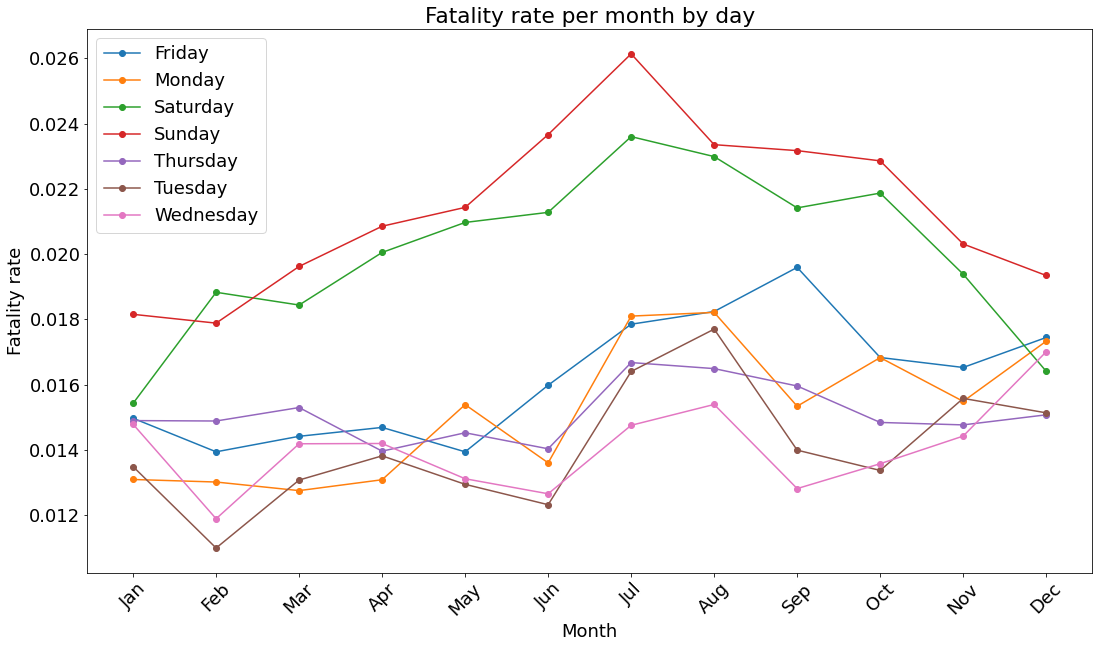

<Figure size 432x288 with 0 Axes>

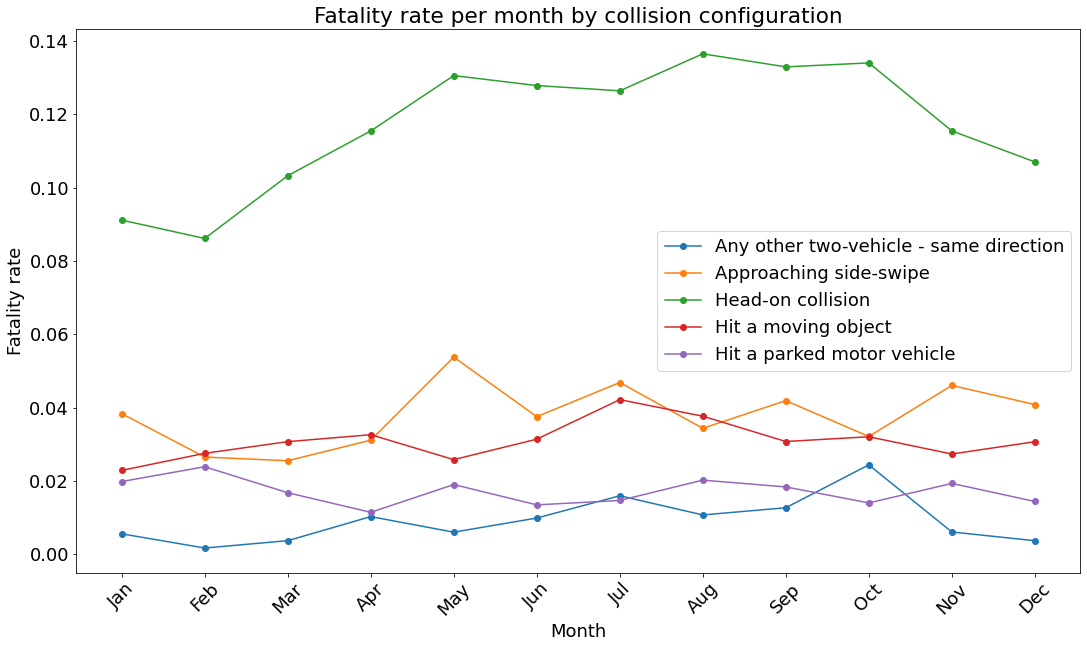

<Figure size 432x288 with 0 Axes>

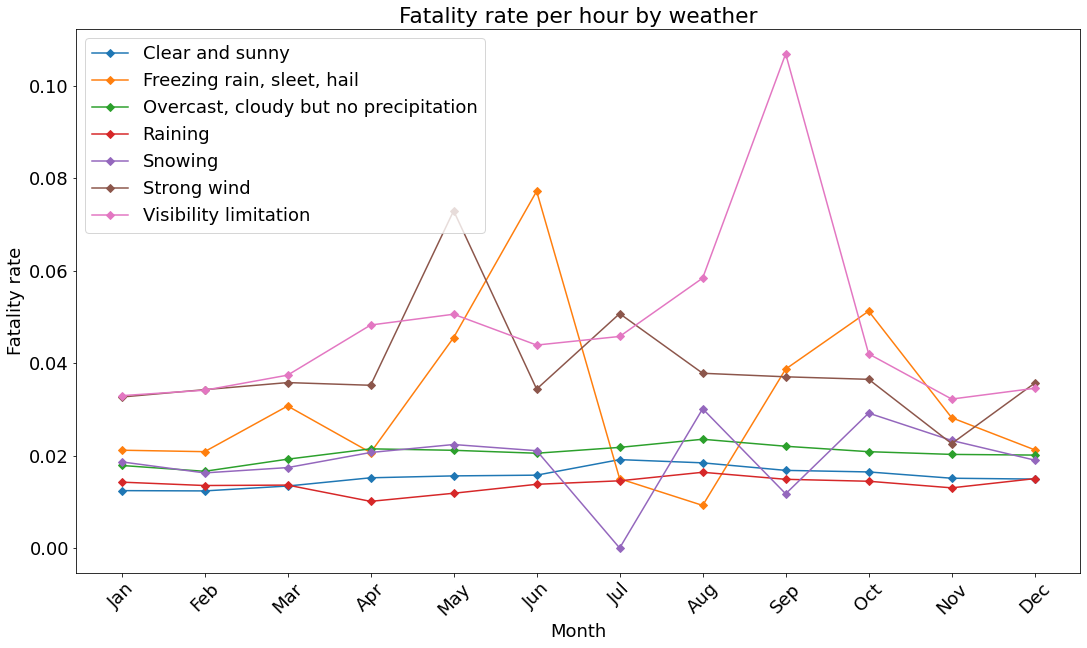

In [7]:
# Change month to integer
month_dict = {'January':1, 'February':2, 'March':3, 'April':4,  'May':5, 'June':6, 
                'July':7,'August':8, 'September':9,'October':10, 'November':11, 
                'December':12 
                }
df2 = df.copy()
df2['c_mnth'].replace(month_dict, inplace = True)

# Pivot tables
table_month1 = df2.pivot_table('class', index = 'c_mnth', columns = 'c_wday', aggfunc = 'mean')
table_month2 = df2.pivot_table('class', index = 'c_mnth', columns = 'c_wthr', aggfunc = 'mean')
table_month3 = df2.pivot_table('class', index = 'c_mnth', columns = 'c_conf', aggfunc = 'mean')

tick = list(table_month1.index)
labels =['Jan', 'Feb', 'Mar', 'Apr',  'May', 'Jun', 
         'Jul','Aug', 'Sep','Oct', 'Nov','Dec'
        ]
# Plot figure
table_month1.plot(marker = 'o',  figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month')
plt.ylabel('Fatality rate')
plt.title('Fatality rate per month by day')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.savefig('../image/fig9a.png')

plt.figure()
cols_to_drop = ['Hit a stationary object',
       'Left turn across opposing traffic', 'Ran off left shoulder',
       'Ran off right shoulder', 'Rear-end collision', 'Right angle collision',
       'Right turn', 'Rollover on roadway', 'Side swipe', 'left turn conflict',
       'right turn conflict','Any other single-vehicle ',
       'Any other two-vehicle - different direction'
       ]
table_month3.drop(cols_to_drop, axis =1).plot(marker = 'o', figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month')
plt.ylabel('Fatality rate')
plt.title('Fatality rate per month by collision configuration')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 0)
plt.savefig('../image/fig9b.png')

plt.figure()
table_month2.plot(marker = 'D', figsize = (18,10), linewidth = 1.5)
plt.xlabel('Month')
plt.ylabel('Fatality rate')
plt.title('Fatality rate per hour by weather')
plt.xticks(tick, labels, rotation = 45)
plt.legend(loc = 2)
plt.savefig('../image/fig9c.png')

#   Fatality rate by gender
- Almost 1 in 100 females are involved in fatal accidents, whereas 2 in 100 males are involved in fatal accidents. Therefore, the fatality rate is high for males than females.

In [8]:
pd.crosstab(index = df['p_sex'], columns = df['class'], normalize= 'index')

class,0,1
p_sex,,
F,0.987630,0.012370
M,0.979674,0.020326


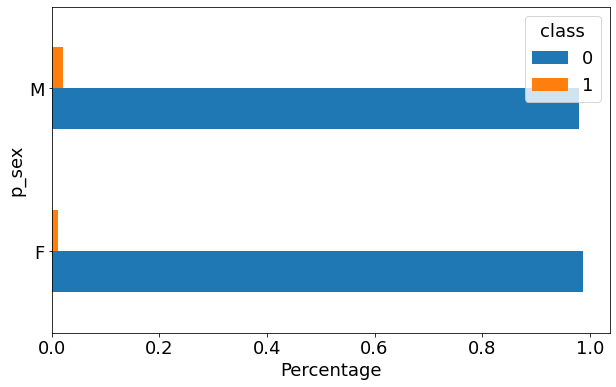

In [9]:
pvt = pd.crosstab(index = df['p_sex'], columns = df['class'], normalize= 'index')
pvt.plot(kind = 'barh', stacked = False, figsize = (10,6))
plt.xlabel('Percentage')
plt.show()

#  Age groups involved in fatal collision
- Young people in their 20s (mostly males) are involved in most fatal collisions
-  Fatality rate is increases in older people

In [10]:
df.pivot_table('p_age', index = 'p_sex', columns = 'class', aggfunc = 'mean')

class,0,1
p_sex,,
F,36.481304,39.426470
M,36.830420,38.676998


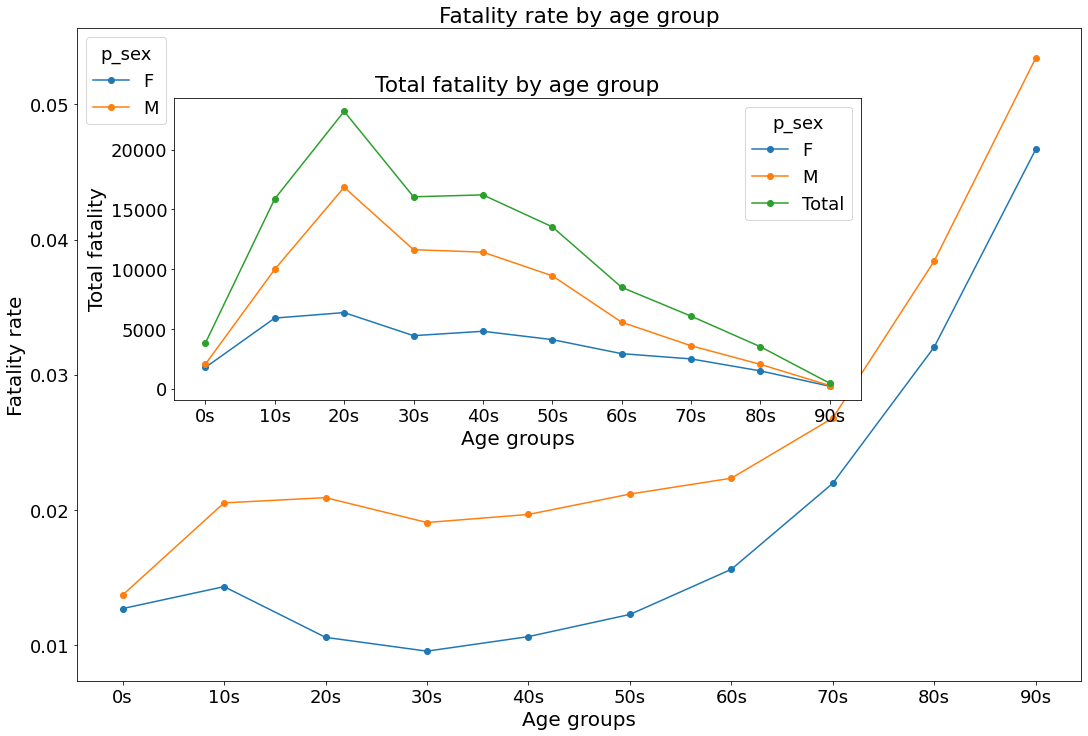

<Figure size 432x288 with 0 Axes>

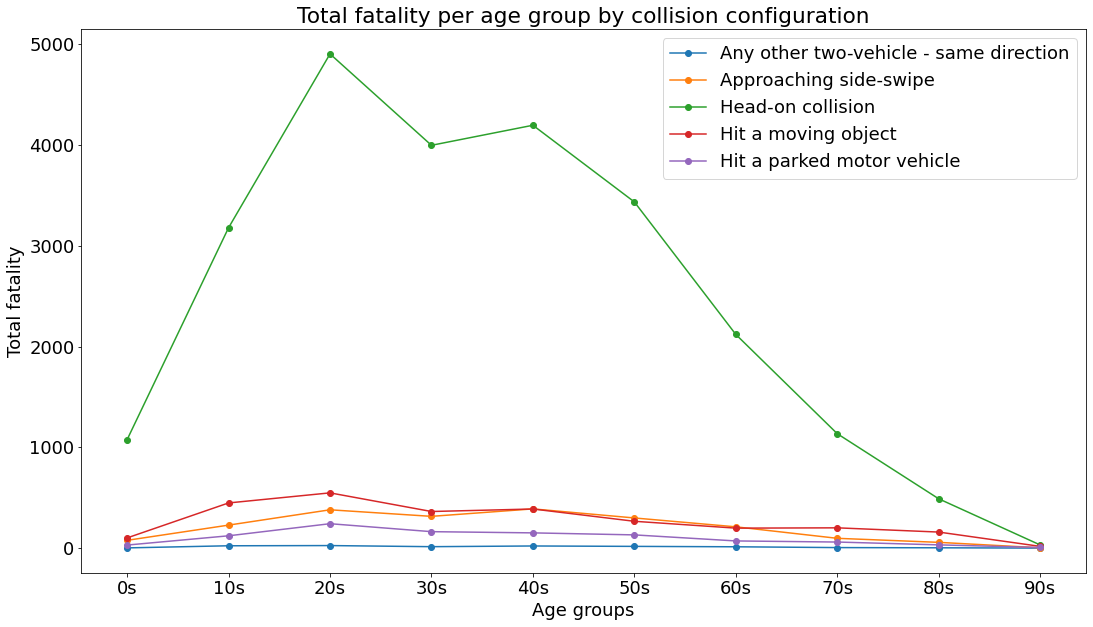

In [11]:
# Creare dataframe
df_p_age = df.copy()
df_p_age['p_age_decade'] = (df_p_age['p_age']//10)*10 # Add age group

# pivot table
pivot_tab_age1 = df_p_age.pivot_table('class', index = 'p_age_decade', 
                                      columns = 'p_sex', aggfunc = 'sum', 
                                      margins = True, margins_name = 'Total')
pivot_tab_age2 = df_p_age.pivot_table('class', index = 'p_age_decade', 
                                      columns = 'p_sex', aggfunc = 'mean')
pivot_tab_age3 = df_p_age.pivot_table('class', index = 'p_age_decade', 
                                      columns = 'c_conf', aggfunc = 'sum')

labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']

tick1 = list(pivot_tab_age1.index)
tick2 = list(pivot_tab_age2.index)
tick1.remove('Total')

# plots
fig, ax1 = plt.subplots(figsize=(18, 12))
left, bottom, width, height = [0.2,0.45,0.53,0.35]
ax2 = fig.add_axes([left, bottom, width, height])

pivot_tab_age2.plot(marker = 'o', ax = ax1)
pivot_tab_age1.drop(['Total']).plot(marker = 'o', ax = ax2)
ax1.set_xlabel('Age groups', fontsize = 20)
ax1.set_ylabel('Fatality rate', fontsize = 20)
ax1.set_title('Fatality rate by age group')
ax1.set_xticks(tick1)
ax1.set_xticklabels(labels)
ax2.set_xlabel('Age groups', fontsize = 20)
ax2.set_ylabel('Total fatality', fontsize = 20)
ax2.set_title('Total fatality by age group')
ax2.set_xticks(tick2)
ax2.set_xticklabels(labels)
plt.savefig('../image/fig3a.png')

plt.figure()
cols_to_drop = ['Hit a stationary object',
       'Left turn across opposing traffic', 'Ran off left shoulder',
       'Ran off right shoulder', 'Rear-end collision', 'Right angle collision',
       'Right turn', 'Rollover on roadway', 'Side swipe', 'left turn conflict',
       'right turn conflict','Any other single-vehicle ',
       'Any other two-vehicle - different direction'
       ]
pivot_tab_age3.drop(cols_to_drop, axis =1).plot(marker = 'o', figsize = (18,10), linewidth = 1.5)
plt.xlabel('Age groups')
plt.ylabel('Total fatality')
plt.title('Total fatality per age group by collision configuration')
plt.xticks(tick2, labels)
plt.legend(loc = 0)
plt.savefig('../image/fig3b.png')

# Age distribution among fatal collision

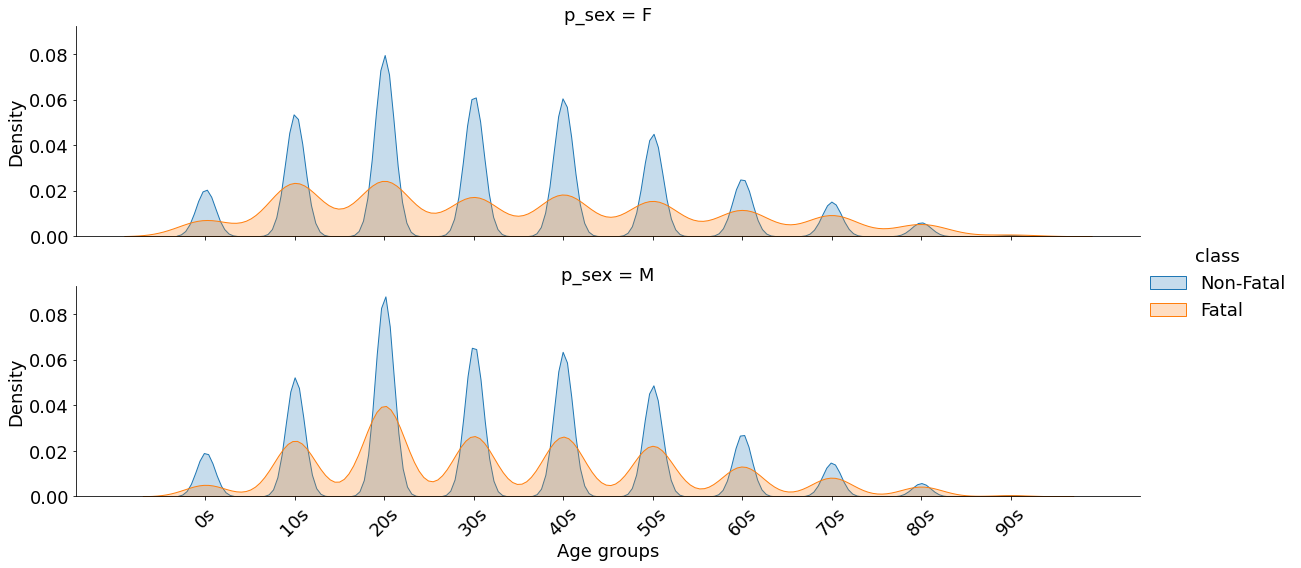

In [12]:
# map class label
df_p_age['class'] =  df_p_age['class'].map({1:'Fatal', 0:'Non-Fatal'})

# plot
g = sns.FacetGrid(data = df_p_age.dropna(), hue = 'class',row= 'p_sex',aspect=4, height=4)
(g.map(sns.kdeplot, 'p_age_decade', fill = True)\
    .set_axis_labels("Age groups","Density")\
        .add_legend()
        )
        
# axes labels
labels = ['0s', '10s', '20s', '30s', '40s', '50s','60s', '70s', '80s', '90s']
plt.xticks(np.arange(0,100,10),labels, rotation = 45)
plt.savefig('../image/fig3c.png')
plt.show()

#  Vehicle model year involved in  fatal collisions
-  The light duty model vehicles in 2000s (i.e. 2000-2009) are involved in most fatal collisions.

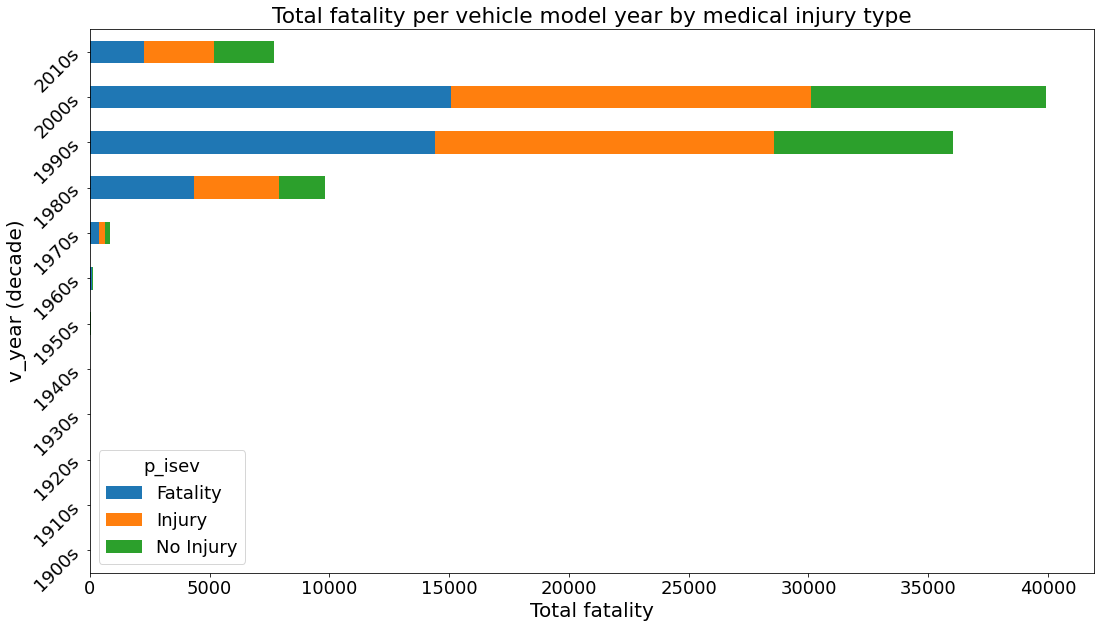

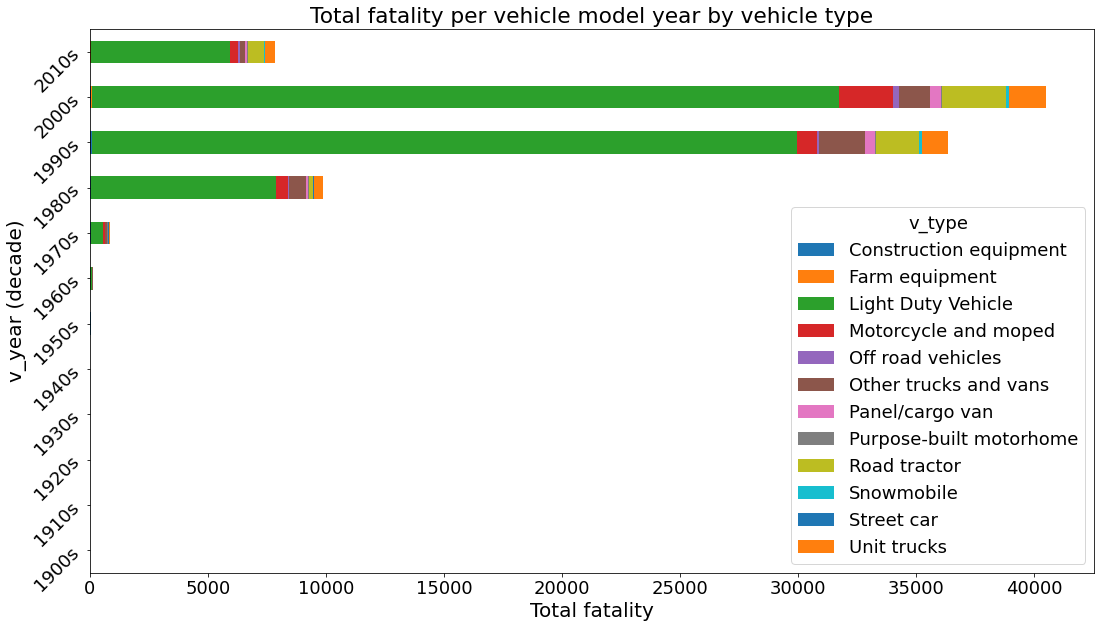

In [13]:
# create dataframe
df_v_year = df.copy()
df_v_year['v_year_decade'] = (df_v_year['v_year']//10)*10

# pivot table
pivot_tab_vyr1 = df_v_year.pivot_table('class', index = 'v_year_decade', 
                                       columns = 'p_isev', aggfunc = 'sum')
pivot_tab_vyr2 = df_v_year.pivot_table('class', index = 'v_year_decade', 
                                       columns = 'v_type', aggfunc = 'sum')

labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s',
        '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
_cols = ['Fire engine', 'Smaller school bus', 'School bus',
         'Urban and Intercity Bus', 'Bicycle']

# plots
fig, ax = plt.subplots(figsize=(18, 10))
pivot_tab_vyr1.plot(kind = 'barh',stacked = True, ax = ax)
ax.set_xlabel('Total fatality', fontsize = 20)
ax.set_ylabel('v_year (decade)', fontsize = 20)
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels, rotation = 45)
ax.set_title('Total fatality per vehicle model year by medical injury type')
plt.savefig('../image/fig5a.png')

fig, ax = plt.subplots(figsize=(18, 10))
pivot_tab_vyr2.drop(_cols, axis =1).plot(kind = 'barh',stacked = True, ax = ax)
ax.set_xlabel('Total fatality', fontsize = 20)
ax.set_ylabel('v_year (decade)', fontsize = 20)
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels, rotation = 45)
ax.set_title('Total fatality per vehicle model year by vehicle type')
plt.savefig('../image/fig5b.png')

# Distribution of vehicle model year by gender
- The vehicle models in 2000s are involved in most fatal collisions.

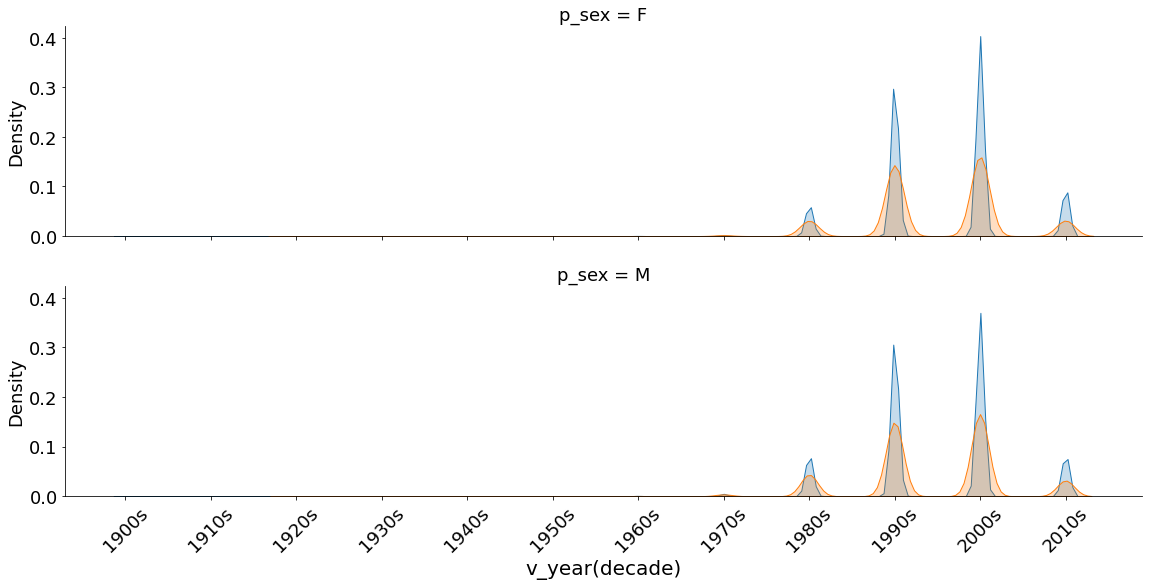

In [37]:
# create dataframe
df_v_year = df.copy()
df_v_year['v_year_decade'] = (df_v_year['v_year']//10)*10
df_v_year['class'] =  df_v_year['class'].map({1 : 'Fatal', 0:'Non-Fatal'})

# plot
g = sns.FacetGrid(data = df_v_year.dropna(), hue = 'class', row = 'p_sex', aspect=4, height=4)
g.map(sns.kdeplot, 'v_year_decade', fill = True).set_axis_labels("Vehicle model year","Density")

labels = ['1900s', '1910s', '1920s', 
          '1930s', '1940s', '1950s',
          '1960s', '1970s', '1980s', 
          '1990s', '2000s', '2010s',
          ]
plt.xlabel("v_year(decade)", fontsize = 20)
plt.xticks(np.arange(1900, 2020, 10), labels, rotation=45)
plt.savefig('../image/fig7.png')

# Fatality rate by year
- Fatal collisions were most likely in the years 1999 & 2007, and the weather condition was visibility limited.

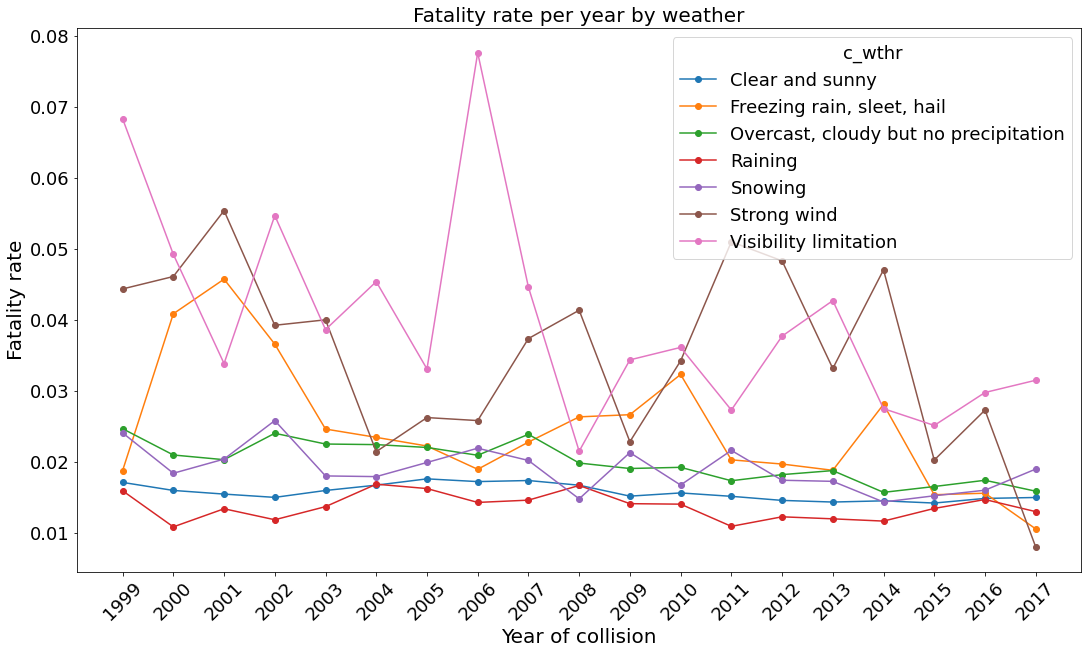

<Figure size 432x288 with 0 Axes>

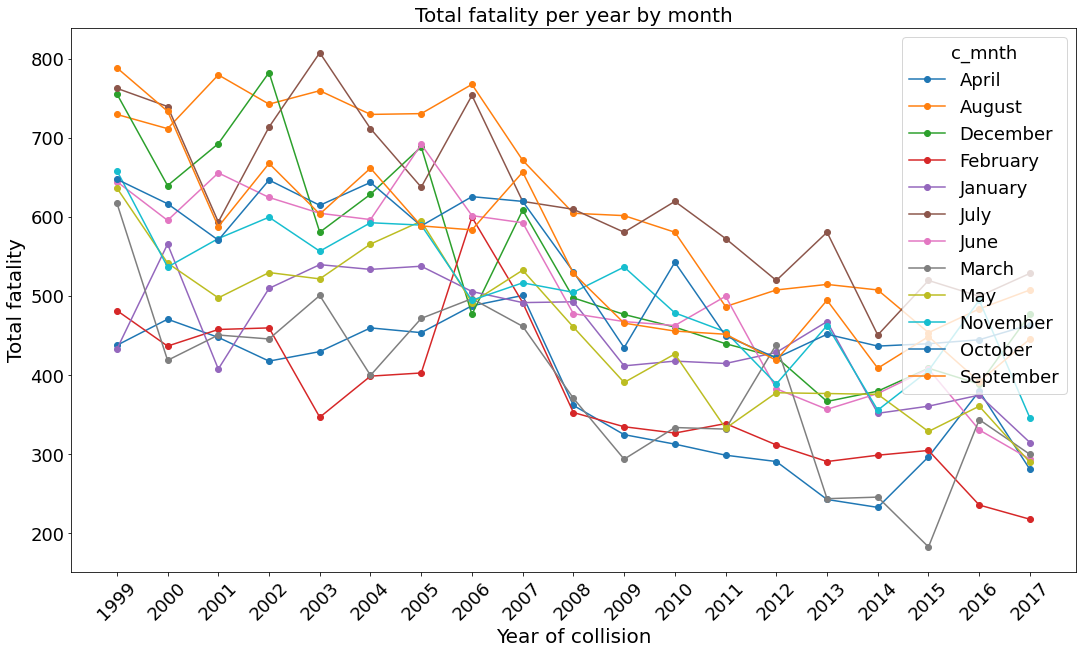

<Figure size 432x288 with 0 Axes>

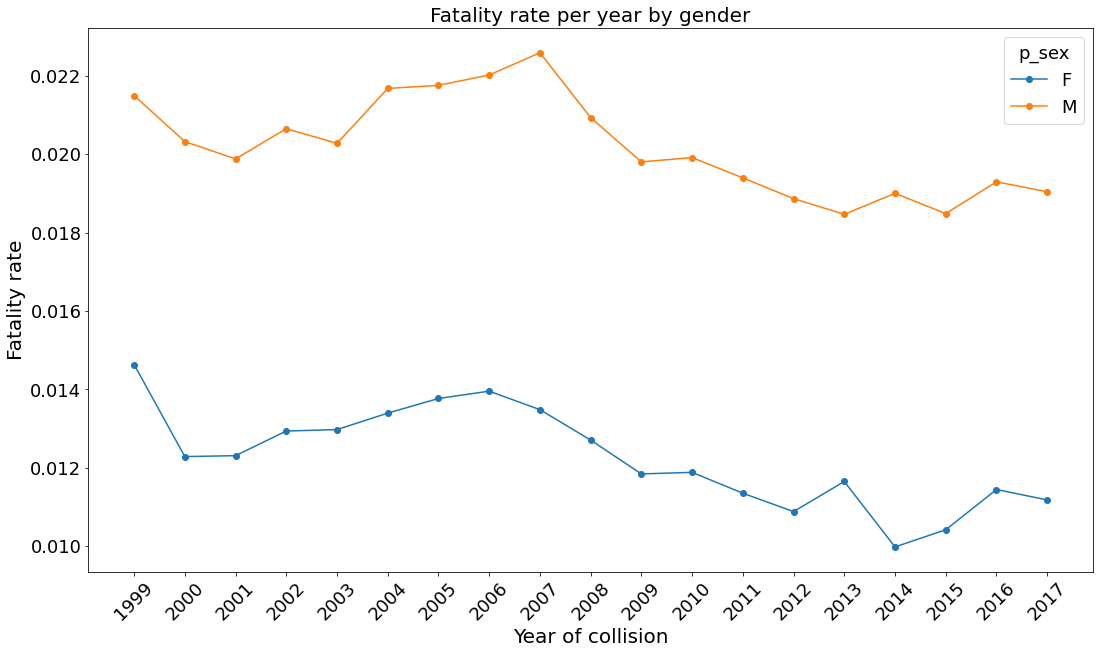

In [20]:
#  plot figure
table_year1 = df.pivot_table('class', index = 'c_year', columns = 'c_wthr', aggfunc = 'mean')
table_year2 = df.pivot_table('class', index = 'c_year', columns = 'c_mnth', aggfunc = 'sum')
table_year3 = df.pivot_table('class', index = 'c_year', columns = 'p_sex', aggfunc = 'mean')

table_year1.plot(marker = 'o',figsize = (18,10))
plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate per year by weather', fontsize = 20)
plt.xticks(np.arange(1999,2018,1), rotation = 45)
plt.savefig('../image/fig1a.png')

plt.figure()
table_year2.plot(marker = 'o',figsize = (18,10))
plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Total fatality', fontsize = 20)
plt.title('Total fatality per year by month', fontsize = 20)
plt.xticks(np.arange(1999,2018,1), rotation = 45)
plt.savefig('../image/fig1b.png')

plt.figure()
table_year3.plot(marker = 'o',figsize = (18,10))
plt.xlabel('Year of collision', fontsize = 20)
plt.ylabel('Fatality rate', fontsize = 20)
plt.title('Fatality rate per year by gender', fontsize = 20)
plt.xticks(np.arange(1999,2018,1), rotation = 45)
plt.savefig('../image/fig1c.png')

# Fatality rate by collision configuration

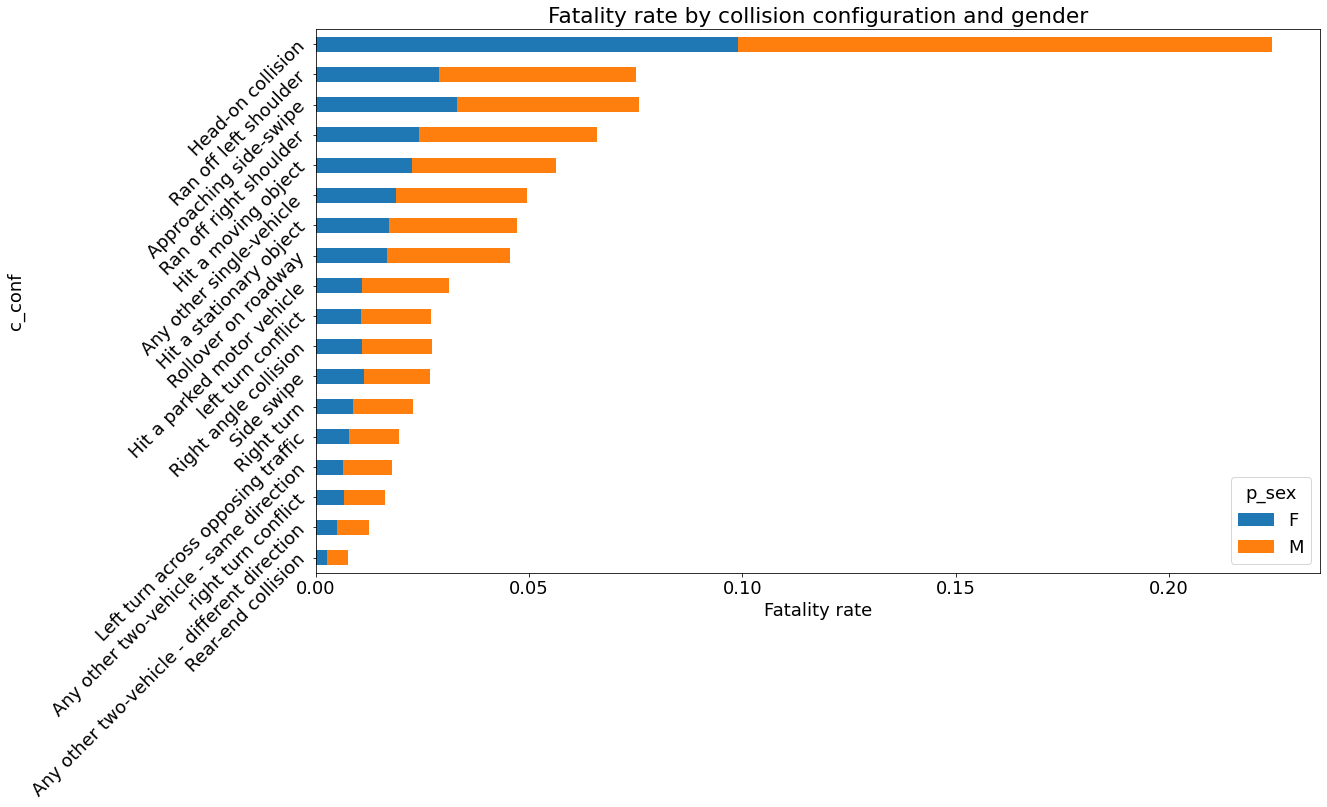

<Figure size 432x288 with 0 Axes>

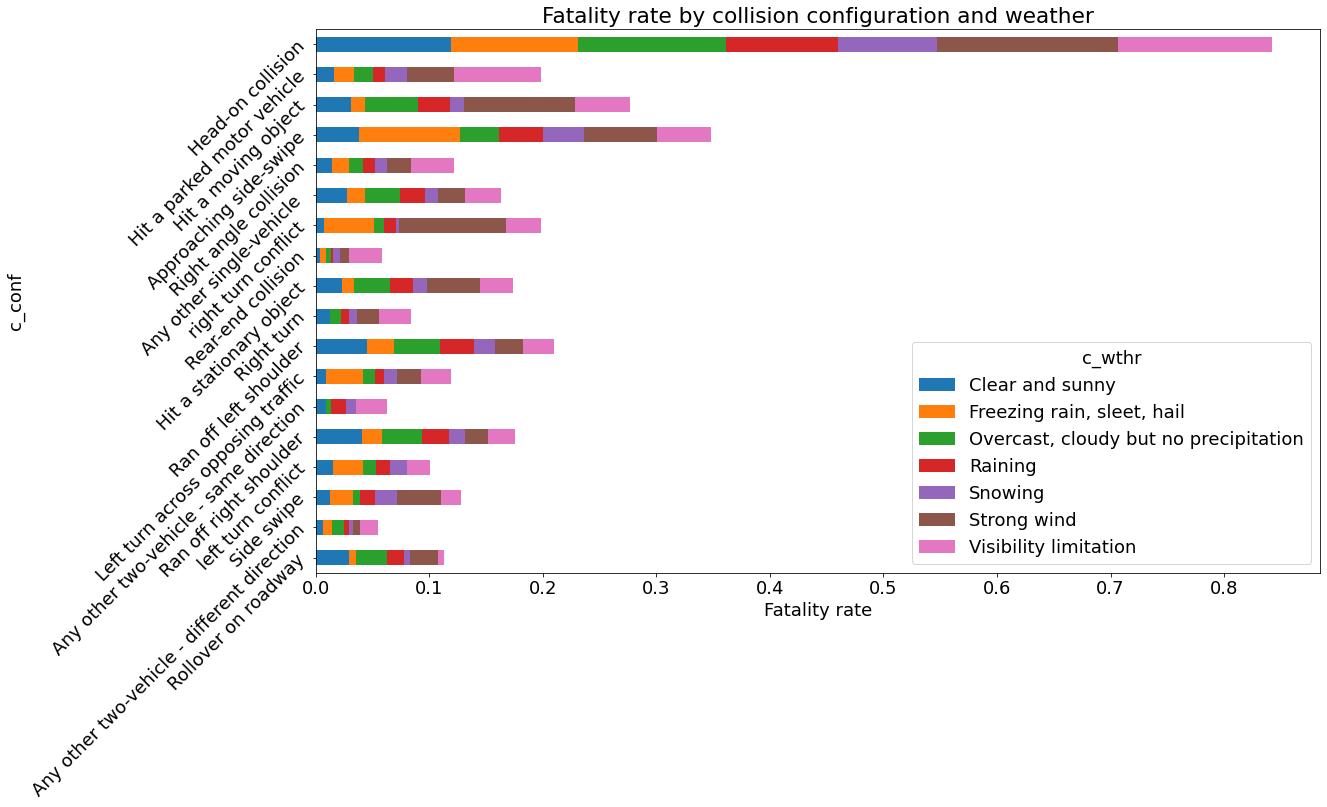

In [21]:
# pivot tables
table_conf1 = df.pivot_table('class', index = 'c_conf', columns = 'p_sex', aggfunc = 'mean')
table_conf2 = df.pivot_table('class', index = 'c_conf', columns = 'c_wthr', aggfunc = 'mean')

# plot figures
table_conf1.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (18,10))
plt.xlabel('Fatality rate')
plt.title('Fatality rate by collision configuration and gender')
plt.yticks(rotation = 45)
plt.savefig('../image/fig_conf1.png')

plt.figure()
table_conf2.sort_values(by =['Visibility limitation']).plot(kind = 'barh', stacked = True, figsize = (18,10))
plt.xlabel('Fatality rate')
plt.title('Fatality rate by collision configuration and weather')
plt.yticks(rotation = 45)
plt.savefig('../image/fig_conf2.png')

# Fatality rate by person position, users, & safety device

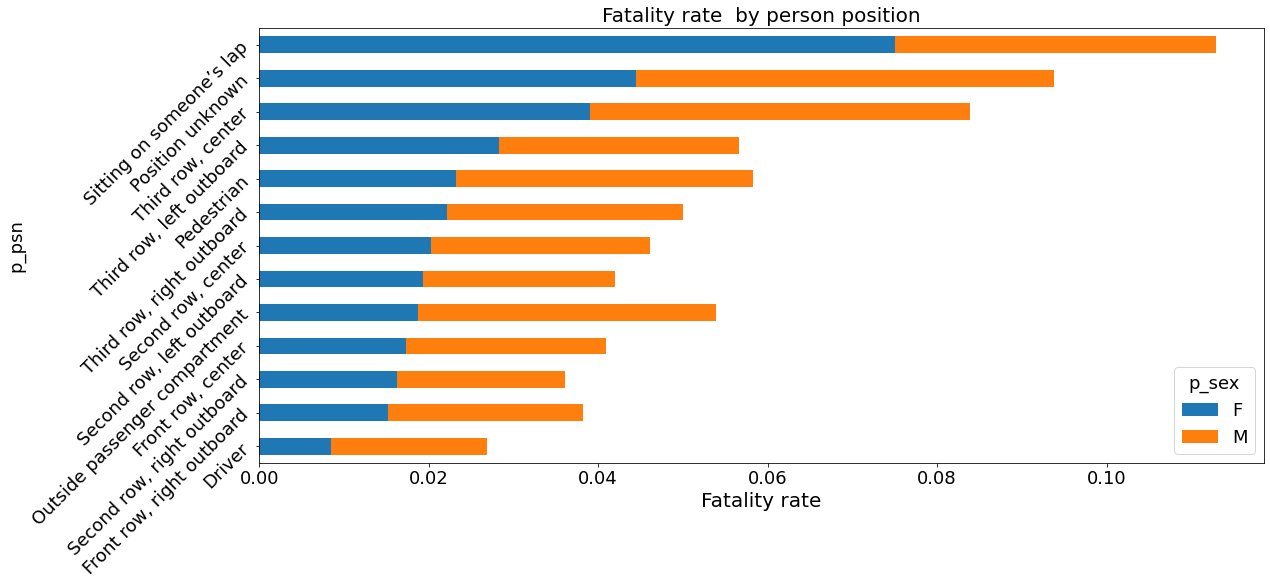

In [22]:
# plot figure
table_year = df.pivot_table('class', index = 'p_psn', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['F']).plot(kind = 'barh', stacked = True,figsize = (18,8))

plt.xlabel('Fatality rate', fontsize = 20)
# plt.ylabel('Person position', fontsize = 20)
plt.title('Fatality rate  by person position', fontsize = 20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig_p.png')

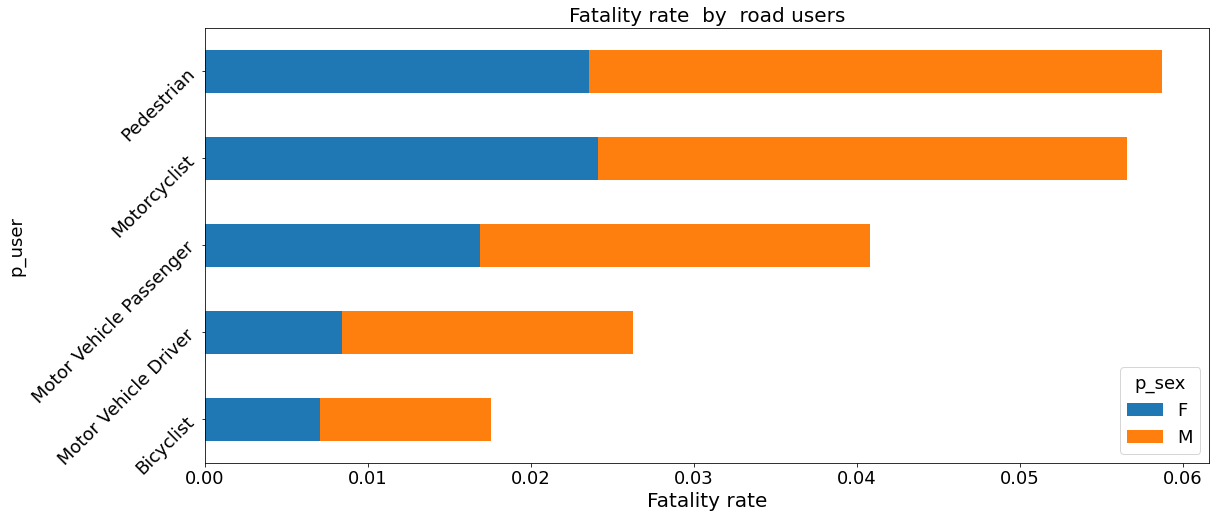

In [23]:
# plot figure
table_year = df.pivot_table('class', index = 'p_user', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = ((18,8)))

plt.xlabel('Fatality rate', fontsize = 20)
# plt.ylabel('Person position', fontsize = 20)
plt.title('Fatality rate  by  road users', fontsize = 20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig_puser.png')

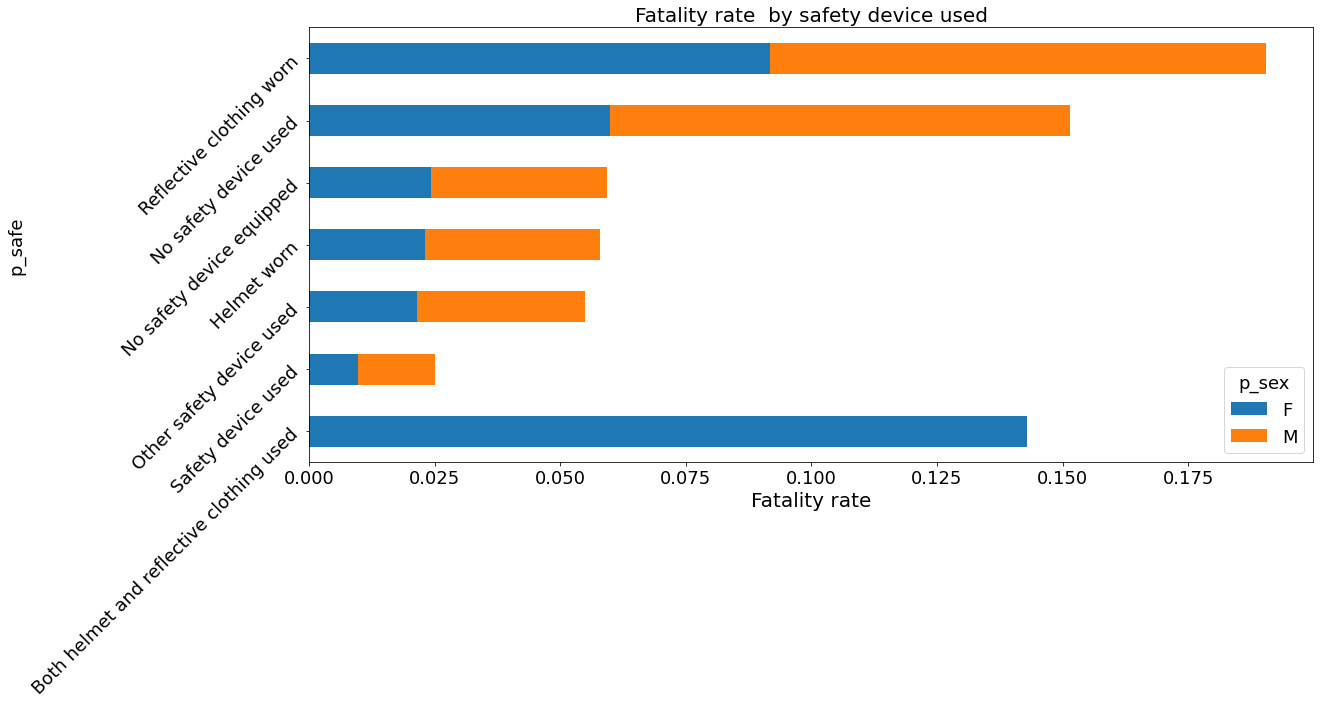

In [24]:
# plot figure
table_year = df.pivot_table('class', index = 'p_safe', columns = 'p_sex', aggfunc = 'mean')
table_year.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (18,8))

plt.xlabel('Fatality rate', fontsize = 20)
# plt.ylabel('Person position', fontsize = 20)
plt.title('Fatality rate  by safety device used', fontsize = 20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig_psafe.png')

# Vechicle types with the most fatal collisions
- Most fatal accident are caused by road tractor

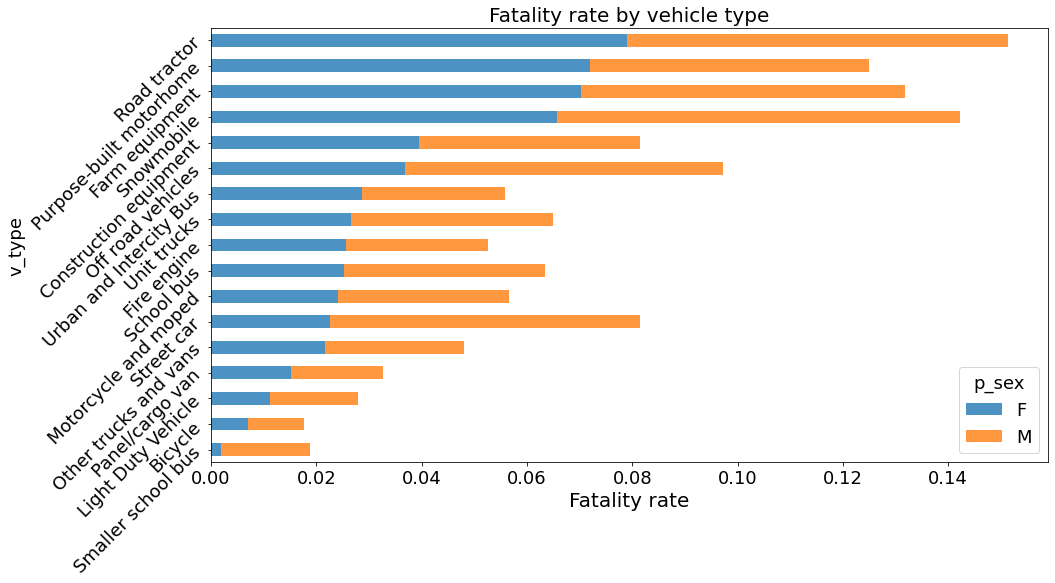

In [25]:
# plot figure
table_vtype = df.pivot_table('class', index = 'v_type', columns = 'p_sex', aggfunc = 'mean')
table_vtype.sort_values(by =['F']).plot(kind = 'barh', stacked = True,figsize = (15,8), alpha =0.8)

# plt.ylabel('Vehicle type', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(loc= 'lower right', title = 'p_sex')
plt.title('Fatality rate by vehicle type', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig6.pdf')

#  Fatality rate by weather condition
- The fatal collisions occur mostly due to visibility limitation

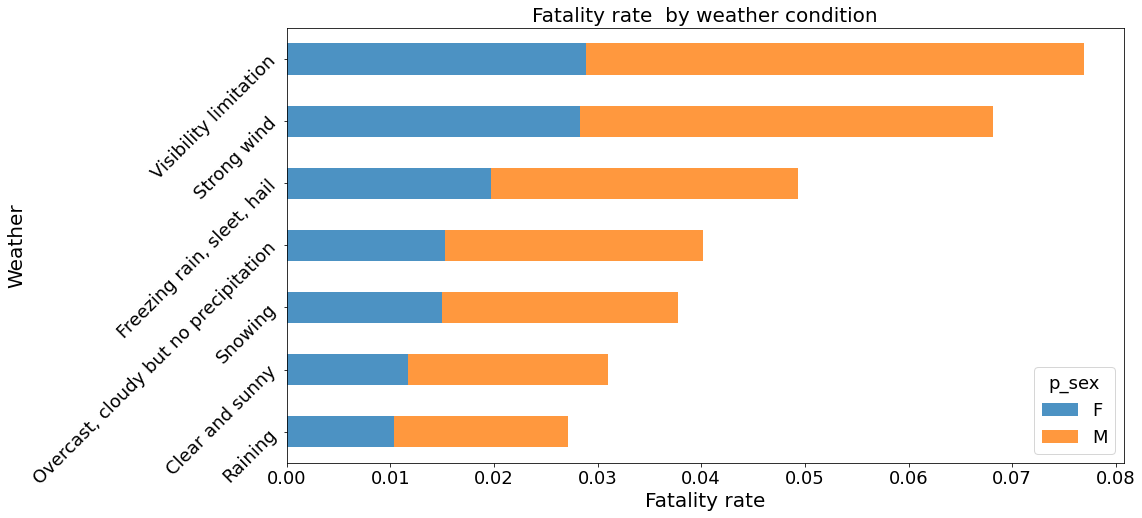

In [26]:
# plot figure
table_weather = df.pivot_table('class', index = 'c_wthr', columns = 'p_sex', aggfunc = 'mean')
table_weather.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8), alpha =0.8)

plt.ylabel('Weather', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.title('Fatality rate  by weather condition', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig10.pdf')

#  Fatality rate by road configuration
- Most fatal accidents occur at passing or climbing lane

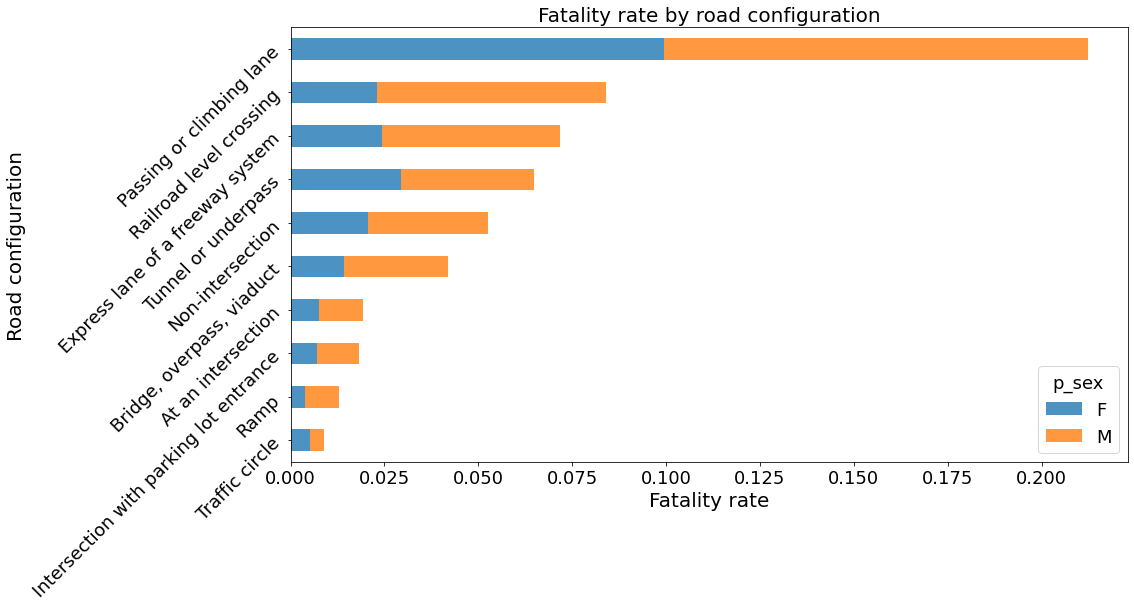

In [27]:
# plot figure
table_road = df.pivot_table('class', index = 'c_rcfg', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8), alpha =0.8)
plt.ylabel('Road configuration', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road configuration', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig11.pdf')

#  Fatality rate by Road alignment, Road surface, & Traffic control


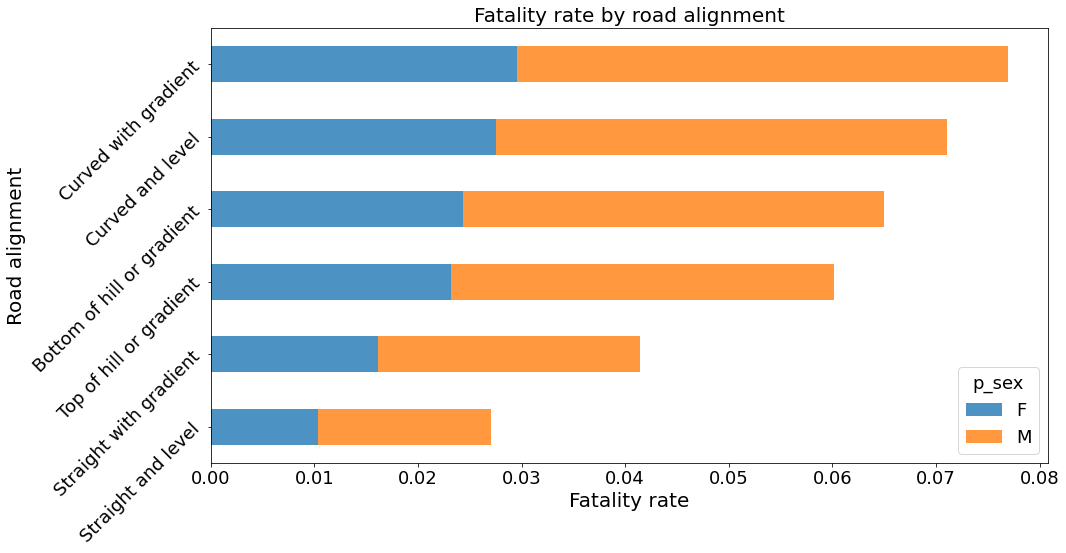

In [28]:
# plot figure
table_road = df.pivot_table('class', index = 'c_raln', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8), alpha =0.8)
plt.ylabel('Road alignment', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road alignment', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig13.png')

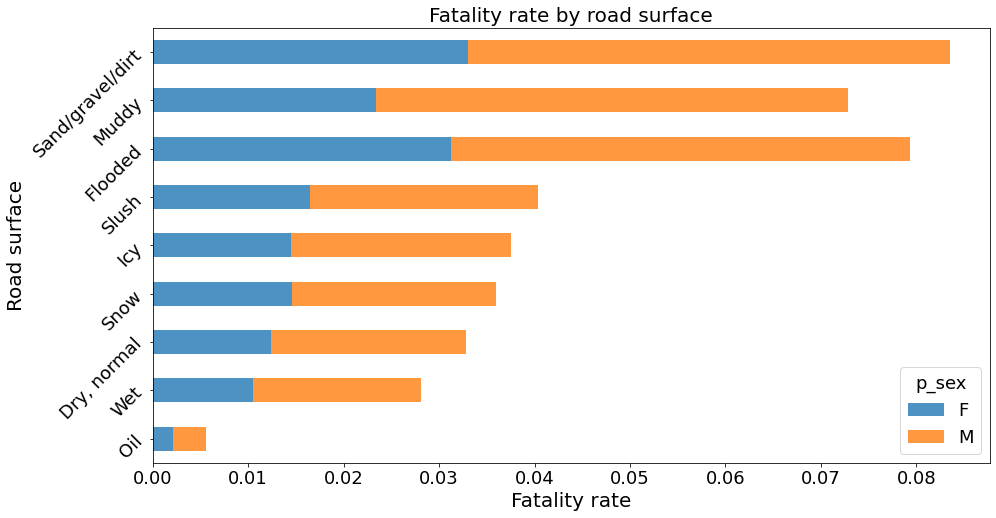

In [29]:
# plot figure
table_road = df.pivot_table('class', index = 'c_rsur', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8), alpha =0.8)
plt.ylabel('Road surface', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by road surface', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig14.png')

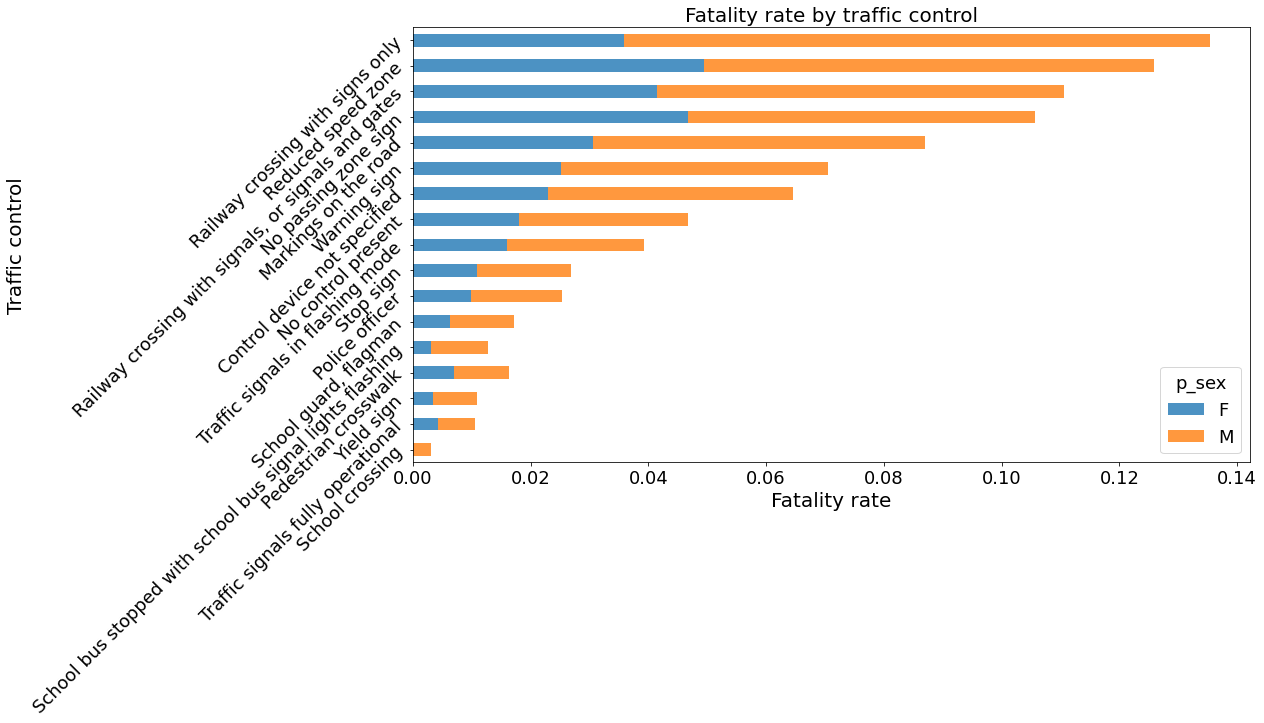

In [30]:
# plot figure
table_road = df.pivot_table('class', index = 'c_traf', columns = 'p_sex', aggfunc = 'mean')
table_road.sort_values(by =['M']).plot(kind = 'barh', stacked = True,figsize = (15,8), alpha =0.8)
plt.ylabel('Traffic control', fontsize=20)
plt.xlabel('Fatality rate', fontsize=20)
plt.legend(title = 'p_sex')
plt.title('Fatality rate by traffic control', fontsize=20)
plt.yticks(rotation = 45)
plt.savefig('../image/fig15.png')

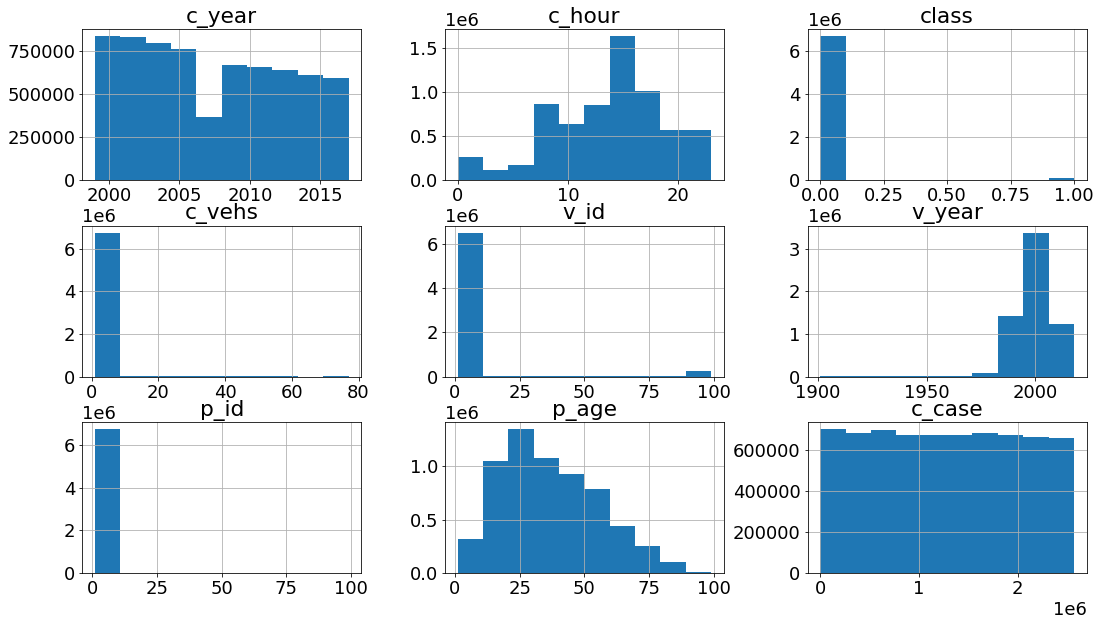

In [31]:
cols = list(df.select_dtypes('number'))
df[cols].hist(figsize = (18,10))
plt.show()